## This notebook is obsolete

**Use [test_display](https://nbviewer.org/github/egourgoulhon/SageMathTest/blob/master/Notebooks/test_display.ipynb) instead.** 

This notebook has not been removed only because some links on Sage Trac may refer to it...

In [1]:
version()

'SageMath version 9.6.beta5, Release Date: 2022-03-12'

In [2]:
%display latex

In [3]:
sin(x^2)

sin(x^2)

## Check the output of type()
Check that [#32859](https://trac.sagemath.org/ticket/32859) is fixed:

In [4]:
type(x)

<class 'sage.symbolic.expression.Expression'>

## Check that [#32208](https://trac.sagemath.org/ticket/32208) is fixed

In [5]:
set([1,2])

{1, 2}

In [6]:
RubiksCube()

+--------------+
             |  1    2    3 |
             |  4   top   5 |
             |  6    7    8 |
+------------+--------------+-------------+------------+
|  9  10  11 | 17   18   19 | 25   26  27 | 33  34  35 |
| 12 left 13 | 20  front 21 | 28 right 29 | 36 rear 37 |
| 14  15  16 | 22   23   24 | 30   31  32 | 38  39  40 |
+------------+--------------+-------------+------------+
             | 41   42   43 |
             | 44 bottom 45 |
             | 46   47   48 |
             +--------------+

## Test of matplotlib.pyplot

Check that [#32882](https://trac.sagemath.org/ticket/32882) is fixed:

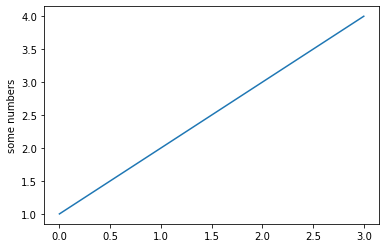

In [7]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

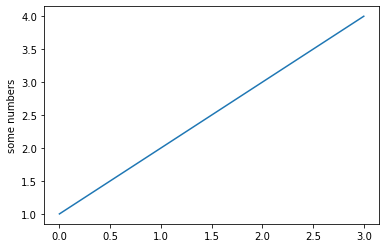

In [8]:
%display plain
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

## Test of Jupyter native LaTeX display via `_repr_latex_`

In [9]:
%display plain

In [10]:
s = sin(x^2)
s

sin(x^2)

In [11]:
view(s)

In [12]:
s._latex_()

'\\sin\\left(x^{2}\\right)'

In [13]:
class A(SageObject):

    def __init__(self, data):
        self._data = data

    def _repr_latex_(self):
        try:
            return '$' + self._data._latex_() + '$'
        except (AttributeError, NotImplementedError):  
            return None  # if None is returned, plain text is used

A(sin(x^2))

In [14]:
s = A(sin(x^2))
s

In [15]:
print(s)

In [16]:
[s, s, s]

In [17]:
g = plot(sin(x^2))
print(A(g))

In [18]:
s0 = A(None)
s0

## Check that `%matplotlib notebook` and `%matplotlib widget` work in the scope of  `%display latex`  ([#33469](https://trac.sagemath.org/ticket/33469))

In [19]:
%display latex
#%display plain

In [20]:
sin(x^2)

sin(x^2)

NB: `%matplotlib notebook` is not supported by **Jupyterlab**; one should use `%matplotlib widget` (which requires the Python package `ipympl`).

Workaround proposed at [#33469](https://trac.sagemath.org/ticket/33469):

In [21]:
sage.repl.display.formatter.IPYTHON_NATIVE_TYPES

(<class 'IPython.core.display.DisplayObject'>,
 <class 'ipywidgets.widgets.interaction.interactive'>)

In [22]:
import ipywidgets
sage.repl.display.formatter.IPYTHON_NATIVE_TYPES += (ipywidgets.Widget,)

sage.repl.display.formatter.IPYTHON_NATIVE_TYPES

(<class 'IPython.core.display.DisplayObject'>,
 <class 'ipywidgets.widgets.interaction.interactive'>,
 <class 'ipywidgets.widgets.widget.Widget'>)

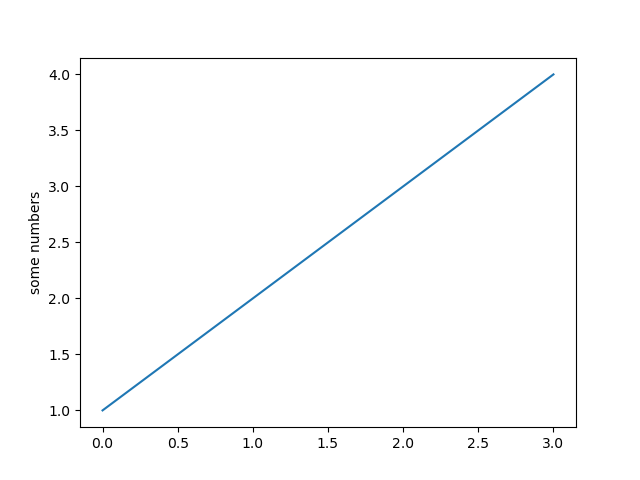

In [23]:
#%matplotlib notebook
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

## Test of interact in the scope of `%display latex`

In [24]:
@interact
def f(n=10):
    print(n)

Interactive function <function f at 0x7f8b7da8d0d0> with 1 widget
  n: IntSlider(value=10, description='n', ma…

In [25]:
%display latex
sin(x^2)

sin(x^2)

In [26]:
@interact
def f(n=10):
    print(n)

Interactive function <function f at 0x7f8b7dafcf70> with 1 widget
  n: IntSlider(value=10, description='n', ma…